# The influence of demographic, social, and school related variables on student’s math grades - Final Report

## Data Exploration and Cleaning

### Import needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_student = pd.read_csv('student-mat.csv',sep=';',header=1,skipinitialspace=True)

### Data Exploration

In [3]:
df_student.head()

,GP,F,18,U,GT3,A,4,4.1,at_home,teacher,...,4.2,3,4.3,1,1.1,3.1,6,5,6.1,6.2
0,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
1,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
2,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
3,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
4,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


In [4]:
# Q1: How many columns are there?

# A1: There are 33 columns.

In [5]:
# Q1: What types are the columms?

# A1: see below

In [6]:
df_student.dtypes

GP         object
F          object
18          int64
U          object
GT3        object
A          object
4           int64
4.1         int64
at_home    object
teacher    object
course     object
mother     object
2           int64
2.1         int64
0           int64
yes        object
no         object
no.1       object
no.2       object
yes.1      object
yes.2      object
no.3       object
no.4       object
4.2         int64
3           int64
4.3         int64
1           int64
1.1         int64
3.1         int64
6           int64
5           int64
6.1         int64
6.2         int64
dtype: object

In [7]:
# Q1: Are there any missing values?

# A1: No

In [8]:
df_student.isnull().values.any()

False

In [9]:
df_student.describe()

,18,4,4.1,2,2.1,0,4.2,3,4.3,1,1.1,3.1,6,5,6.1,6.2
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,16.692893,2.746193,2.517766,1.446701,2.035533,0.335025,3.944162,3.236041,3.106599,1.482234,2.294416,3.555838,5.708122,10.923858,10.725888,10.426396
std,1.275967,1.094306,1.087022,0.697835,0.840305,0.744405,0.897794,1.000061,1.113785,0.891543,1.287884,1.391789,8.013258,3.309988,3.758754,4.581844
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
df_student.dtypes

GP         object
F          object
18          int64
U          object
GT3        object
A          object
4           int64
4.1         int64
at_home    object
teacher    object
course     object
mother     object
2           int64
2.1         int64
0           int64
yes        object
no         object
no.1       object
no.2       object
yes.1      object
yes.2      object
no.3       object
no.4       object
4.2         int64
3           int64
4.3         int64
1           int64
1.1         int64
3.1         int64
6           int64
5           int64
6.1         int64
6.2         int64
dtype: object

Q1: Are there an equal number of M and F?

A1: There are 382 M and 266 F.

In [11]:
df_student.groupby('F').count()

,GP,18,U,GT3,A,4,4.1,at_home,teacher,course,...,4.2,3,4.3,1,1.1,3.1,6,5,6.1,6.2
F,,,,,,,,,,,,,,,,,,,,,
F,207,207,207,207,207,207,207,207,207,207,...,207,207,207,207,207,207,207,207,207,207
M,187,187,187,187,187,187,187,187,187,187,...,187,187,187,187,187,187,187,187,187,187


### Add the columns of the features for readibility

In [12]:
# Add column names for readability
names = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason',\
           'guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities',\
            'nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc',\
            'health','absences','G1','G2','G3']

In [13]:
df_student.columns = names

In [14]:
df_student.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
1,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
2,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
3,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
4,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
5,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
6,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
7,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
8,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
9,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9


In [15]:
df_student.shape

(394, 33)

### Separate the data into values by sex

In [16]:
df_student_f = df_student[(df_student['sex']) == 'F']
print(df_student_f)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   17       U     GT3       T     1     1   at_home     other   
1       GP   F   15       U     LE3       T     1     1   at_home     other   
2       GP   F   15       U     GT3       T     4     2    health  services   
3       GP   F   16       U     GT3       T     3     3     other     other   
6       GP   F   17       U     GT3       A     4     4     other   teacher   
9       GP   F   15       U     GT3       T     4     4   teacher    health   
10      GP   F   15       U     GT3       T     2     1  services     other   
14      GP   F   16       U     GT3       T     4     4    health     other   
15      GP   F   16       U     GT3       T     4     4  services  services   
16      GP   F   16       U     GT3       T     3     3     other     other   
23      GP   F   15       R     GT3       T     2     4  services    health   
24      GP   F   16       U     GT3       T     2   

In [17]:
### Grade distributio: male and female students

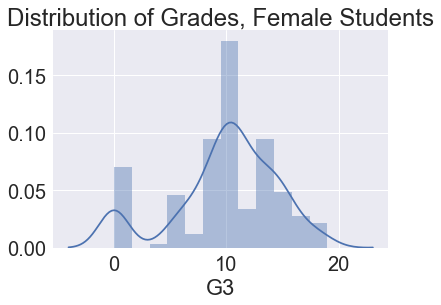

In [18]:
import seaborn as sns
sns.set(font_scale=2)
sns.distplot(df_student_f['G3'])
plt.title('Distribution of Grades, Female Students')
plt.show()


In [19]:
df_student_m = df_student[(df_student['sex']) == 'M']
print (df_student_m)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
4       GP   M   16       U     LE3       T     4     3  services     other   
5       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   M   15       U     LE3       A     3     2  services     other   
8       GP   M   15       U     GT3       T     3     4     other     other   
11      GP   M   15       U     LE3       T     4     4    health  services   
12      GP   M   15       U     GT3       T     4     3   teacher     other   
13      GP   M   15       U     GT3       A     2     2     other     other   
17      GP   M   17       U     GT3       T     3     2  services  services   
18      GP   M   16       U     LE3       T     4     3    health     other   
19      GP   M   15       U     GT3       T     4     3   teacher     other   
20      GP   M   15       U     GT3       T     4     4    health    health   
21      GP   M   16       U     LE3       T     4   

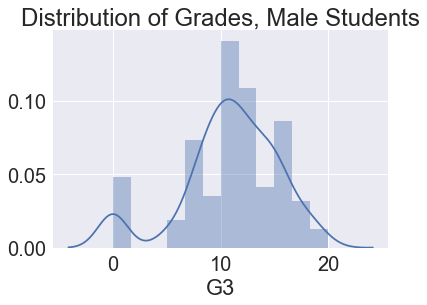

In [20]:
import seaborn as sns
sns.set(font_scale=2)
sns.distplot(df_student_m['G3'])
plt.title('Distribution of Grades, Male Students')
plt.show()


In [21]:
df_student_f.mean()

age           16.724638
Medu           2.661836
Fedu           2.478261
traveltime     1.405797
studytime      2.280193
failures       0.304348
famrel         3.893720
freetime       3.009662
goout          3.024155
Dalc           1.256039
Walc           1.961353
health         3.367150
absences       6.217391
G1            10.647343
G2            10.410628
G3             9.985507
dtype: float64

In [22]:
df_student_m.mean()

age           16.657754
Medu           2.839572
Fedu           2.561497
traveltime     1.491979
studytime      1.764706
failures       0.368984
famrel         4.000000
freetime       3.486631
goout          3.197861
Dalc           1.732620
Walc           2.663102
health         3.764706
absences       5.144385
G1            11.229947
G2            11.074866
G3            10.914439
dtype: float64

### Perform t_test statistic to compare male and female grades


In [23]:
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
t, p = ttest_ind(df_student_m['G3'], df_student_f['G3'])

In [24]:
print (t, p)

2.01739414104 0.0443354606975


In [25]:
df_student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Box Plot Comparisons

In [26]:
# Is there a correlation between the amount a student studies (st) and their final grade (g)?

df_student_f_st = df_student_f['studytime']
df_student_f_g = df_student_f['G3']

df_student_m_st = df_student_m['studytime']
df_student_m_g = df_student_m['G3']

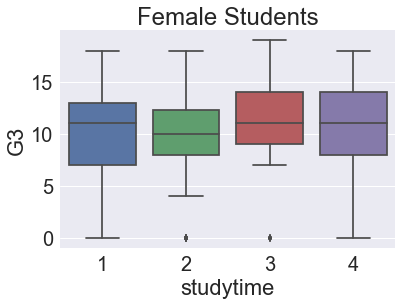

In [27]:
import seaborn as sns
sns.boxplot(df_student_f_st,df_student_f_g)
plt.title('Female Students')
plt.show()

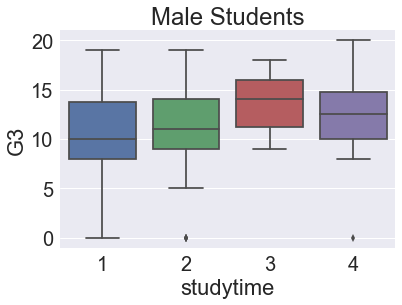

In [28]:
sns.boxplot(df_student_m_st,df_student_m_g)
plt.title('Male Students')
plt.show()

In [29]:
from scipy.stats import linregress
linregress(df_student_f_st, df_student_f_g)

LinregressResult(slope=0.58451857919428019, intercept=8.6526919353637677, rvalue=0.10029530399556982, pvalue=0.15046578264225646, stderr=0.40499103880719262)

In [30]:
linregress(df_student_m_st, df_student_m_g)

LinregressResult(slope=0.98017408123791283, intercept=9.184719535783362, rvalue=0.17633526474008557, pvalue=0.015772923166266745, stderr=0.40227122719908803)

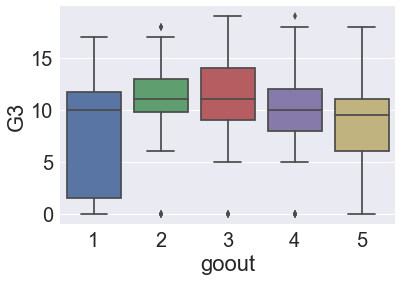

<function matplotlib.pyplot.show>

In [31]:
# Is there a correlation between the amount of time that the students go out (goout) and their
# grades (g)?

df_student_f_go = df_student_f['goout']

df_student_m_go = df_student_m['goout']

sns.boxplot(df_student_f_go, df_student_f_g)
plt.show()

sns.boxplot(df_student_m_go, df_student_m_g)
plt.show

In [32]:
list(df_student)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

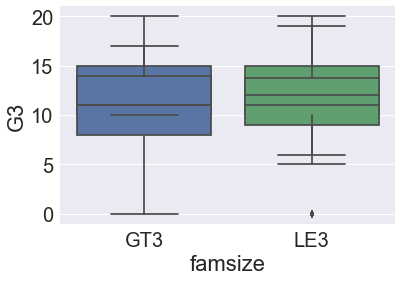

In [33]:
# Is there a correlation between the student's family size and their grades?

df_student_famsize = df_student['famsize']
df_student_g = df_student['G3']

sns.boxplot(df_student_famsize, df_student_g)
plt.show()

 Concluson: Family size has no correlation with final student grades

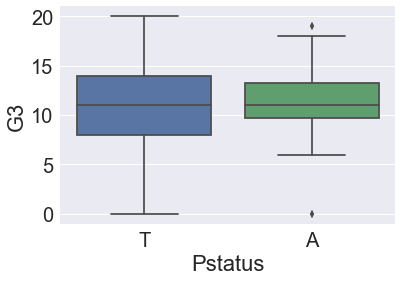

In [34]:
# Is there a correlation between the student's parent's cohabitation and grades?

df_student_Ps = df_student['Pstatus']
df_student_g = df_student['G3']

sns.boxplot(df_student_Ps, df_student_g)
plt.show()

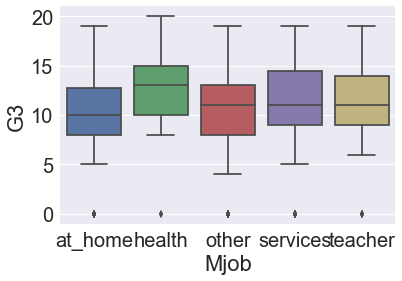

In [35]:
# Is there a correlation between the student's mother's job and grades?

df_student_mjob = df_student['Mjob']
df_student_g = df_student['G3']

sns.boxplot(df_student_mjob, df_student_g)
plt.show()

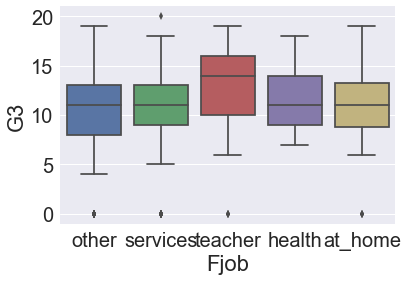

In [36]:
# Is there a correlation between the student's father's job and grades?

df_student_fjob = df_student['Fjob']
df_student_g = df_student['G3']

sns.boxplot(df_student_fjob, df_student_g)
plt.show()

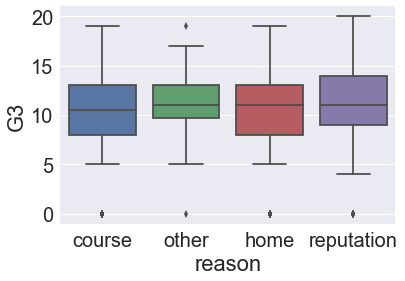

In [37]:
# Is there a correlation between the student's reason for choosing their school and grades?

df_student_reason = df_student['reason']
df_student_g = df_student['G3']

sns.boxplot(df_student_reason, df_student_g)
plt.show()

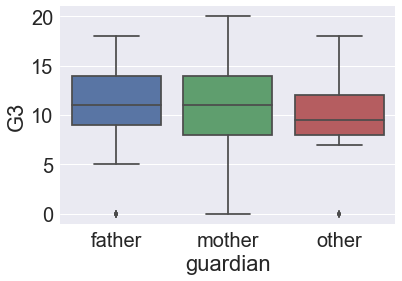

In [38]:
# Is there a correlation between the student's guardian and grades?

df_student_guard = df_student['guardian']
df_student_g = df_student['G3']

sns.boxplot(df_student_guard, df_student_g)
plt.show()

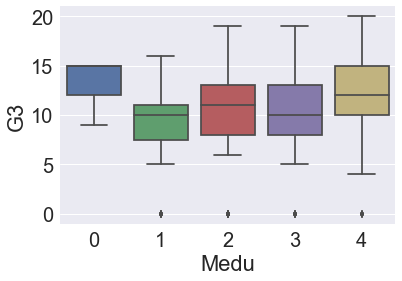

In [39]:
# Is there a correlation between the education of the student's mother and their grades?

df_student_medu = df_student['Medu']
df_student_g = df_student['G3']

sns.boxplot(df_student_medu, df_student_g)
plt.show()

In [40]:
# Is there a correlation between the father's education level and the students grades?

df_student_fedu = df_student['Fedu']
df_student_g = df_student['G3']

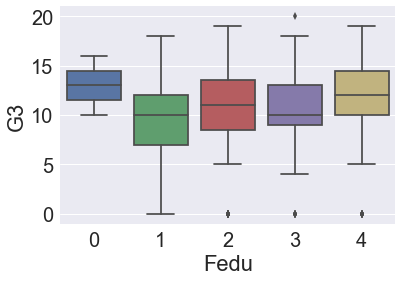

In [41]:
sns.boxplot(df_student_fedu, df_student_g)
plt.show() 

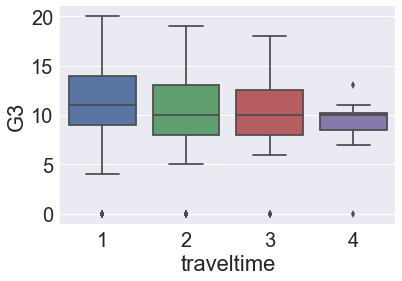

In [42]:
# Is there a correlation between the travel time from home to school and their grades?

df_student_tt = df_student['traveltime']
df_student_g = df_student['G3']

sns.boxplot(df_student_tt, df_student_g)
plt.show()

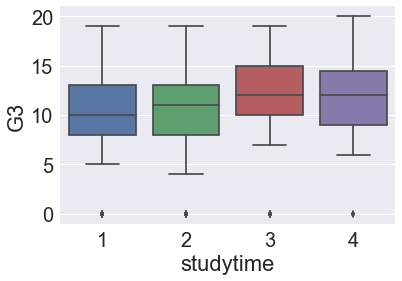

In [43]:
# Is there a correlation between the student's study time and grades?

df_student_stime = df_student['studytime']
df_student_g = df_student['G3']

sns.boxplot(df_student_stime, df_student_g)
plt.show()

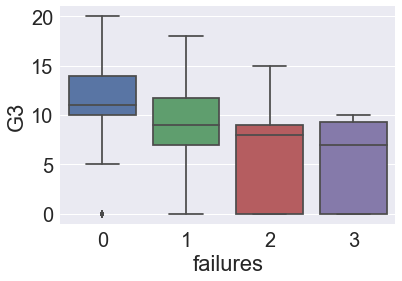

In [44]:
# Is there a correlation between the student's previous failures and their grades?

df_student_fail = df_student['failures']
df_student_g = df_student['G3']

sns.boxplot(df_student_fail, df_student_g)
plt.show()

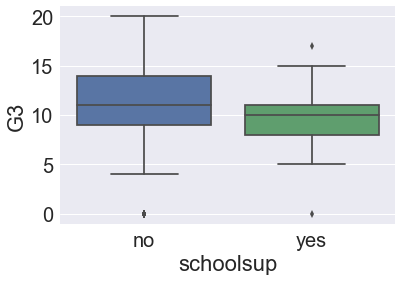

In [45]:
# Is there a correlation between the student's support from the school and their grades?

df_student_sups = df_student['schoolsup']
df_student_g = df_student['G3']

sns.boxplot(df_student_sups, df_student_g)
plt.show()

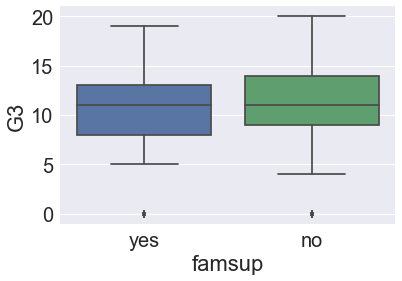

In [46]:
# Is there a correlation between the student's family education support and their grades?

df_student_fes = df_student['famsup']
df_student_g = df_student['G3']

sns.boxplot(df_student_fes, df_student_g)
plt.show()

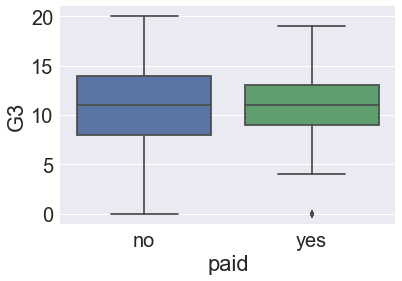

In [47]:
# Is there a correlation between the student's payment for extra classes and their grades?

df_student_exc = df_student['paid']
df_student_g = df_student['G3']

sns.boxplot(df_student_exc, df_student_g)
plt.show()

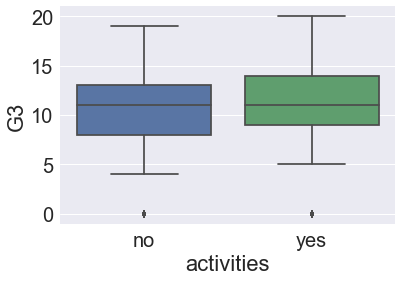

In [48]:
# Is there a correlation between the student's attendance in extra curricular activities 
#  and their grades?

df_student_xca = df_student['activities']
df_student_g = df_student['G3']

sns.boxplot(df_student_xca, df_student_g)
plt.show()

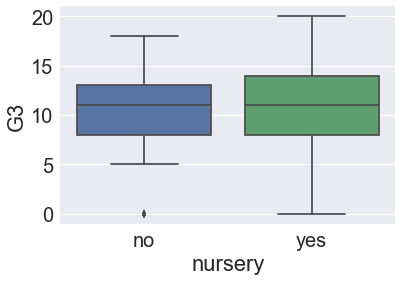

In [49]:
# Is there a correlation between the whether the student attended nursery school and grades?

df_student_nurs = df_student['nursery']
df_student_g = df_student['G3']

sns.boxplot(df_student_nurs, df_student_g)
plt.show()

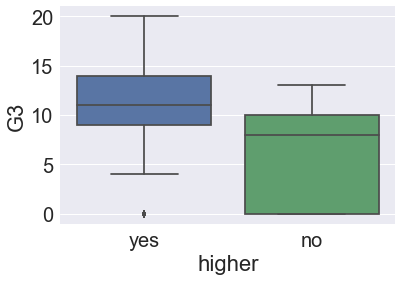

In [50]:
# Is there a correlation between the student's who want to pursue higher education and their grades?

df_student_high = df_student['higher']
df_student_g = df_student['G3']

sns.boxplot(df_student_high, df_student_g)
plt.show()

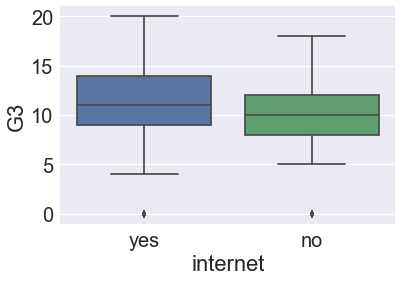

In [51]:
# Is there a correlation between the student's access to the internet at home and their grades?

df_student_net = df_student['internet']
df_student_g = df_student['G3']

sns.boxplot(df_student_net, df_student_g)
plt.show()

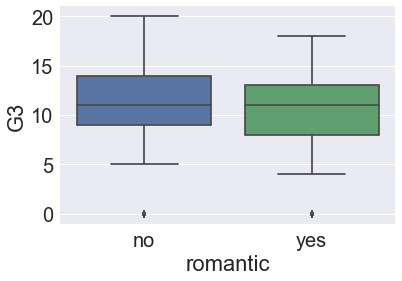

In [52]:
# Is there a correlation between whether the student is in a romantic relationship and grades?

df_student_rom = df_student['romantic']
df_student_g = df_student['G3']

sns.boxplot(df_student_rom, df_student_g)
plt.show()

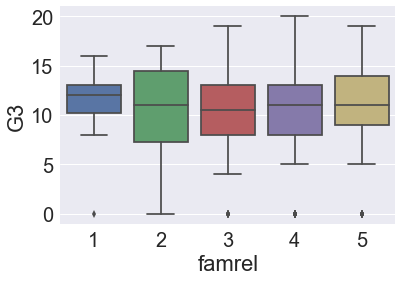

In [53]:
# Is there a correlation between the student's quality of family relationships and their grades?

df_student_famrel = df_student['famrel']
df_student_g = df_student['G3']

sns.boxplot(df_student_famrel, df_student_g)
plt.show()

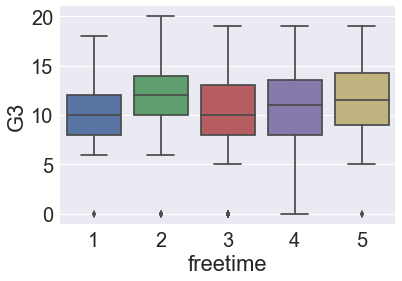

In [54]:
# Is there a correlation between the student's free time and their grades?

df_student_ft = df_student['freetime']
df_student_g = df_student['G3']

sns.boxplot(df_student_ft, df_student_g)
plt.show()

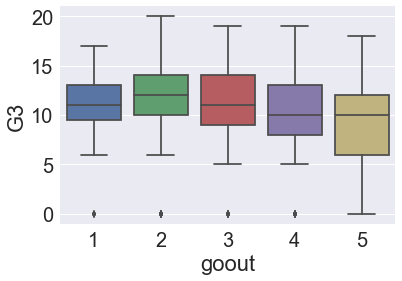

In [55]:
# Is there a correlation between whether the student goes out with friends and grades?

df_student_goout = df_student['goout']
df_student_g = df_student['G3']

sns.boxplot(df_student_goout, df_student_g)
plt.show()

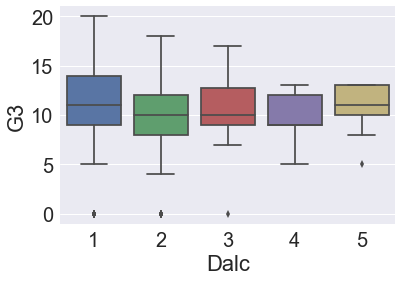

In [56]:
# Is there a correlation between the student's daily comsumption of alcohol and their grades?

df_student_dalc = df_student['Dalc']
df_student_g = df_student['G3']

sns.boxplot(df_student_dalc, df_student_g)
plt.show()

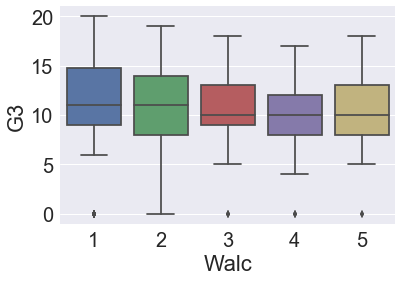

In [57]:
# Is there a correlation between the student's weekend comsumption of alcohol and their grades?

df_student_walc = df_student['Walc']
df_student_g = df_student['G3']

sns.boxplot(df_student_walc, df_student_g)
plt.show()

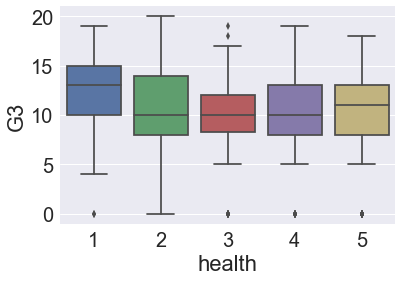

In [58]:
# Is there a correlation between the student's health and their grades?

df_student_h = df_student['health']
df_student_g = df_student['G3']

sns.boxplot(df_student_h, df_student_g)
plt.show()

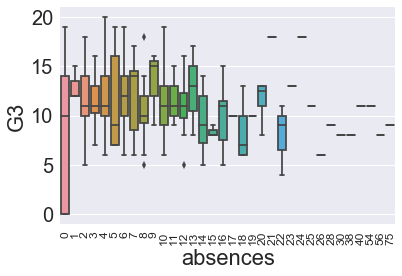

In [59]:
# Is there a correlation between the student's absences and their grades?

df_student_ab = df_student['absences']
df_student_g = df_student['G3']

sns.boxplot(df_student_ab, df_student_g)
plt.xticks(rotation=90, fontsize = 12)
plt.show()

### Calculate the Pearson r for the correlation between student study time and their grades.

In [60]:
from scipy import stats

stats.pearsonr(df_student_stime, df_student_g)

(0.09783201662633742, 0.052331443918780023)

In [61]:
stats.pearsonr(df_student_fail, df_student_g)

(-0.36203783476827389, 1.2026086331215661e-13)

In [62]:
stats.pearsonr(df_student_dalc, df_student_g)

(-0.056071324937290098, 0.26686050637940145)

In [63]:
df_student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [64]:
from scipy.stats import linregress
linregress(df_student_fail, df_student_g)

LinregressResult(slope=-2.2283576523238957, intercept=11.172952309915619, rvalue=-0.36203783476827339, pvalue=1.2026086331214998e-13, stderr=0.28978770247030755)

In [65]:
df_student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Data Preprocessing


In [66]:
### Use sklearn OneHotEncoder

In [67]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: reason.

data_reason = df_student['reason']
print (data_reason)
encoded = to_categorical(data_reason)
inverted = argmax (encoded[0])
print(inverted)

In [68]:
data_reason = df_student['reason']
values_reason = array (data_reason)
print (values_reason)

#integer encode
label_encoder = LabelEncoder()
integer_encoded_reason = label_encoder.fit_transform(values_reason)
print (integer_encoded_reason)

#binary encode
#onehot_encoded = OneHotEncoder(sparse = False)
#integer_encoded_reason = integer_encoded_reason.reshape(len(integer_encoded_reason),1)
#onehot_encoded_reason = onehot_encoded.fit_transform(integer_encoded_reason)
#print(onehot_encoded_reason)
#df_student['reason'] = onehot_encoded_reason

['course' 'other' 'home' 'home' 'reputation' 'home' 'home' 'home' 'home'
 'reputation' 'reputation' 'course' 'course' 'home' 'home' 'reputation'
 'reputation' 'course' 'home' 'reputation' 'other' 'course' 'reputation'
 'course' 'home' 'home' 'other' 'home' 'home' 'home' 'reputation' 'course'
 'course' 'home' 'other' 'home' 'reputation' 'course' 'reputation' 'home'
 'home' 'course' 'course' 'course' 'course' 'home' 'reputation' 'home'
 'other' 'course' 'other' 'other' 'course' 'other' 'other' 'reputation'
 'reputation' 'home' 'course' 'other' 'course' 'reputation' 'home'
 'reputation' 'course' 'reputation' 'course' 'reputation' 'reputation'
 'reputation' 'course' 'reputation' 'reputation' 'home' 'home' 'course'
 'reputation' 'home' 'course' 'course' 'home' 'reputation' 'home' 'home'
 'reputation' 'course' 'reputation' 'reputation' 'reputation' 'home'
 'reputation' 'home' 'home' 'reputation' 'home' 'reputation' 'course'
 'reputation' 'course' 'other' 'other' 'course' 'home' 'course'
 're

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: Mjob.

In [69]:
data_Mjob = df_student['Mjob']
values_Mjob = array(data_Mjob)

print (values_Mjob)

['at_home' 'at_home' 'health' 'other' 'services' 'other' 'other' 'services'
 'other' 'teacher' 'services' 'health' 'teacher' 'other' 'health'
 'services' 'other' 'services' 'health' 'teacher' 'health' 'teacher'
 'other' 'services' 'services' 'other' 'health' 'services' 'teacher'
 'health' 'services' 'teacher' 'other' 'other' 'other' 'teacher' 'other'
 'services' 'at_home' 'other' 'teacher' 'services' 'services' 'other'
 'other' 'other' 'health' 'teacher' 'services' 'services' 'health' 'health'
 'services' 'other' 'other' 'services' 'teacher' 'other' 'services'
 'health' 'services' 'other' 'teacher' 'services' 'teacher' 'other'
 'services' 'health' 'other' 'other' 'other' 'other' 'other' 'other'
 'teacher' 'teacher' 'other' 'other' 'at_home' 'other' 'other' 'services'
 'services' 'other' 'services' 'at_home' 'other' 'services' 'teacher'
 'other' 'services' 'other' 'teacher' 'services' 'at_home' 'services'
 'other' 'other' 'other' 'services' 'services' 'services' 'services'
 'services' '

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: Mjob.

In [70]:
#integer encode

label_encoded_Mjob = LabelEncoder()
integer_encoded_Mjob = label_encoded_Mjob.fit_transform(values_Mjob)
print (integer_encoded_Mjob)

[0 0 1 2 3 2 2 3 2 4 3 1 4 2 1 3 2 3 1 4 1 4 2 3 3 2 1 3 4 1 3 4 2 2 2 4 2
 3 0 2 4 3 3 2 2 2 1 4 3 3 1 1 3 2 2 3 4 2 3 1 3 2 4 3 4 2 3 1 2 2 2 2 2 2
 4 4 2 2 0 2 2 3 3 2 3 0 2 3 4 2 3 2 4 3 0 3 2 2 2 3 3 3 3 3 2 2 3 2 1 4 3
 0 4 1 4 2 2 2 2 0 3 2 1 2 3 2 0 3 4 3 0 2 3 0 3 0 2 3 4 4 3 4 0 2 2 1 0 4
 3 2 0 3 3 2 0 2 0 0 2 0 2 2 0 2 3 2 1 2 1 2 2 4 0 2 4 3 2 4 2 4 3 3 2 2 3
 3 2 1 0 3 0 0 3 2 3 3 4 3 4 1 2 2 2 3 0 3 4 0 4 2 3 2 3 3 2 2 3 0 0 0 0 3
 2 4 2 2 3 0 2 1 2 4 1 2 0 2 2 0 2 1 4 4 3 2 2 2 3 2 2 3 0 3 2 2 1 4 3 2 3
 3 4 2 2 0 2 3 4 1 2 2 2 2 0 0 3 2 4 1 4 3 4 0 2 2 2 0 3 3 4 4 1 3 3 3 1 1
 2 2 4 1 2 2 1 2 3 3 4 2 0 3 0 2 3 0 2 3 2 0 4 3 2 3 3 0 2 2 3 4 4 2 0 3 2
 0 3 3 2 3 2 3 4 3 0 0 2 4 4 1 2 2 1 0 2 3 3 4 3 2 0 0 0 3 0 2 0 4 2 0 2 3
 0 2 2 2 2 1 4 2 0 4 2 2 2 2 0 4 3 4 2 3 3 2 3 2]


In [71]:
#onehot_encoded = OneHotEncoder(sparse = False)
#integer_encoded_Mjob = integer_encoded_Mjob.reshape(len(integer_encoded_Mjob),1)
#onehot_encoded_Mjob = onehot_encoded.fit_transform(integer_encoded_Mjob)
#print(onehot_encoded_reason)
#df_student['Mjob'] = onehot_encoded_Mjob

In [72]:
#df_student['Mjob'] = onehot_encoded_Mjob

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: Fjob.

In [73]:
data_Fjob = df_student['Fjob']
values_Fjob = array(data_Fjob)

In [74]:
print (values_Fjob)

['other' 'other' 'services' 'other' 'other' 'other' 'teacher' 'other'
 'other' 'health' 'other' 'services' 'other' 'other' 'other' 'services'
 'other' 'services' 'other' 'other' 'health' 'other' 'other' 'health'
 'services' 'other' 'services' 'other' 'teacher' 'services' 'services'
 'at_home' 'other' 'other' 'other' 'services' 'teacher' 'health' 'other'
 'other' 'other' 'teacher' 'services' 'at_home' 'other' 'services'
 'services' 'other' 'teacher' 'services' 'other' 'health' 'services'
 'other' 'other' 'services' 'health' 'at_home' 'other' 'teacher' 'services'
 'services' 'health' 'services' 'services' 'services' 'other' 'services'
 'other' 'other' 'other' 'other' 'other' 'services' 'other' 'other' 'other'
 'other' 'other' 'services' 'other' 'other' 'services' 'other' 'services'
 'other' 'other' 'other' 'health' 'other' 'other' 'other' 'services'
 'health' 'other' 'other' 'other' 'other' 'at_home' 'services' 'teacher'
 'other' 'other' 'other' 'health' 'other' 'other' 'other' 'health'


In [75]:
# integer encode
label_encoder_Fjob = LabelEncoder()
integer_encoded_Fjob = label_encoder_Fjob.fit_transform(values_Fjob)
print (integer_encoded_Fjob)

[2 2 3 2 2 2 4 2 2 1 2 3 2 2 2 3 2 3 2 2 1 2 2 1 3 2 3 2 4 3 3 0 2 2 2 3 4
 1 2 2 2 4 3 0 2 3 3 2 4 3 2 1 3 2 2 3 1 0 2 4 3 3 1 3 3 3 2 3 2 2 2 2 2 3
 2 2 2 2 2 3 2 2 3 2 3 2 2 2 1 2 2 2 3 1 2 2 2 2 0 3 4 2 2 2 1 2 2 2 1 4 2
 2 2 3 4 4 3 2 2 3 3 1 2 2 3 2 2 2 4 4 2 2 2 4 0 2 2 2 4 3 3 3 0 2 3 3 2 4
 2 2 2 3 0 4 3 2 2 2 3 2 2 2 3 3 3 2 3 2 1 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 3
 3 2 2 2 3 3 3 3 2 3 4 2 4 4 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 1 2 0 3 2 4
 2 3 2 2 3 2 2 2 2 4 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 3 2 2 2 3 2 2 2 3 0 2 3
 2 2 2 2 3 2 2 2 2 2 3 3 2 0 1 2 3 3 1 3 2 3 2 2 2 2 0 4 3 4 2 3 0 2 2 2 2
 2 2 4 2 4 2 1 2 0 2 3 3 2 3 2 3 2 1 2 2 2 3 2 3 2 3 3 0 2 3 2 3 4 2 2 3 2
 2 2 0 2 3 2 3 3 2 0 2 3 3 2 2 2 3 2 3 2 2 3 3 2 3 3 2 2 3 0 3 2 3 3 3 4 3
 3 0 2 2 2 2 3 2 2 4 2 3 3 2 2 0 2 3 2 3 3 2 2 0]


In [76]:
# binary encode

#onehot_encoder_Fjob = OneHotEncoder(sparse = False)
#integer_encoded_Fjob = integer_encoded_Fjob.reshape(len(integer_encoded_Fjob),1)
#onehot_encoded_Fjob = onehot_encoder_Fjob.fit_transform(integer_encoded_Fjob)
#print(onehot_encoded_Fjob)

In [77]:
#df_student['Fjob'] = onehot_encoded_Fjob

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: guardian.

In [78]:
data_guard = df_student['guardian']
values_guard = array(data_guard)

print (values_guard)

['father' 'mother' 'mother' 'father' 'mother' 'mother' 'mother' 'mother'
 'mother' 'mother' 'father' 'father' 'mother' 'other' 'mother' 'mother'
 'mother' 'mother' 'father' 'mother' 'father' 'mother' 'mother' 'mother'
 'mother' 'mother' 'mother' 'mother' 'mother' 'mother' 'mother' 'mother'
 'mother' 'mother' 'father' 'mother' 'mother' 'mother' 'mother' 'mother'
 'other' 'father' 'father' 'father' 'mother' 'mother' 'mother' 'mother'
 'father' 'mother' 'mother' 'father' 'mother' 'mother' 'mother' 'mother'
 'mother' 'father' 'mother' 'mother' 'father' 'father' 'mother' 'father'
 'mother' 'mother' 'mother' 'mother' 'father' 'father' 'mother' 'mother'
 'mother' 'mother' 'mother' 'mother' 'mother' 'mother' 'mother' 'father'
 'mother' 'mother' 'mother' 'father' 'father' 'mother' 'mother' 'father'
 'mother' 'mother' 'mother' 'father' 'mother' 'mother' 'mother' 'mother'
 'mother' 'mother' 'mother' 'mother' 'father' 'mother' 'mother' 'mother'
 'father' 'mother' 'father' 'father' 'mother' 'mother

In [79]:
#onehot_encoder_guard = OneHotEncoder(sparse = False)

In [80]:
label_encoder = LabelEncoder()
integer_encoded_guard = label_encoder.fit_transform(values_guard)
print (integer_encoded_guard)


[0 1 1 0 1 1 1 1 1 1 0 0 1 2 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 2 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 2 1 1 0 1 0 0 1 1 1 2 1 1 0 0 1 1 1 0 0 1 1
 1 1 1 2 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 2 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 2 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2
 2 0 1 1 0 1 0 2 2 2 2 0 2 2 2 2 2 2 2 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 2
 1 1 2 1 1 1 2 0 1 0 1 1 1 1 1 1 2 1 1 2 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 2
 0 1 1 1 1 2 1 1 1 0 1 0 1 0 1 1 1 1 1 2 1 2 1 0]


In [81]:
#onehot_encoder = OneHotEncoder(sparse = False)
#integer_encoded_guard = integer_encoded_guard.reshape(len(integer_encoded_guard),1)
#onehot_encoded_guard = onehot_encoder.fit_transform(integer_encoded_guard)
#print(onehot_encoded_guard)

In [82]:
#df_student['guardian'] = onehot_encoded_guard

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: age.

In [83]:
onehot_encoder_Fjob = OneHotEncoder(sparse = False)
integer_encoded_Fjob = integer_encoded_Fjob.reshape(len(integer_encoded_Fjob),1)
onehot_encoded_Fjob = onehot_encoder_Fjob.fit_transform(integer_encoded_Fjob)
print(onehot_encoded_Fjob)

[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 ..., 
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]]


In [84]:
data_age = df_student['age']
values_age = array (data_age)
print (values_age)

label_encoder = LabelEncoder()
integer_encoded_age = label_encoder.fit_transform(values_age)
print (integer_encoded_age)


#onehot_encoded_age = OneHotEncoder(sparse = False)
#integer_encoded_age = integer_encoded_age.reshape(len(integer_encoded_age),1)
#onehot_encoded_age = onehot_encoded_age.fit_transform(integer_encoded_age)
#print(onehot_encoded_age)


[17 15 15 16 16 16 17 15 15 15 15 15 15 15 16 16 16 17 16 15 15 16 16 15 16
 15 15 16 16 15 15 15 15 16 15 15 16 15 15 16 15 15 15 16 15 16 16 15 15 16
 15 15 15 15 16 15 15 15 16 16 16 16 16 15 16 15 16 15 15 16 15 15 16 16 15
 15 16 17 16 15 15 15 15 15 15 16 15 16 16 16 15 16 16 15 15 16 16 16 16 16
 16 15 15 15 15 15 16 15 16 15 16 16 15 15 16 15 16 17 15 15 15 16 16 16 15
 15 19 18 16 15 15 17 16 15 15 17 16 16 15 15 16 15 16 17 15 15 15 16 15 18
 16 15 19 17 15 17 18 16 16 17 15 16 17 17 16 16 16 16 16 16 16 17 16 16 17
 16 17 16 17 16 16 17 17 16 17 16 16 17 17 16 17 17 16 16 17 17 16 17 16 16
 16 17 17 16 17 16 16 16 17 19 17 16 18 17 17 17 18 17 17 17 17 16 18 16 18
 17 17 18 17 17 17 17 16 16 16 17 16 17 18 17 17 16 16 18 16 17 22 18 16 18
 16 18 16 17 17 17 19 18 17 18 18 18 17 18 18 17 18 18 18 19 18 18 17 17 17
 18 18 18 18 17 17 18 18 17 17 18 17 18 18 18 17 18 17 18 17 19 18 18 18 18
 17 17 17 19 18 20 19 19 19 19 19 19 19 19 19 18 18 17 18 17 17 17 17 17 18
 17 17 17 17

In [85]:
df_student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [86]:
# create dummy variables to convert categorical into numeric values

mylist = list(df_student.select_dtypes(include=['object']).columns)

In [87]:
dummies = pd.get_dummies(df_student[mylist], prefix= mylist)

In [88]:
dummies

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
1,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
2,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
3,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0
4,1,0,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
5,1,0,0,1,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
6,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
7,1,0,0,1,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,1,0
8,1,0,0,1,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
9,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,0,1,1,0


In [89]:
mylist

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [90]:
df_student.drop(mylist, axis=1, inplace = True)

X = pd.concat([df_student,dummies], axis =1 )

In [91]:
X.shape

(394, 59)

In [92]:
X.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
school_GP            uint8
school_MS            uint8
sex_F                uint8
sex_M                uint8
address_R            uint8
address_U            uint8
famsize_GT3          uint8
famsize_LE3          uint8
Pstatus_A            uint8
Pstatus_T            uint8
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
r

In [93]:
df_student.dtypes

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

## Train and Test Model

In [94]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

# for cross validation

from sklearn.model_selection import train_test_split

X = X.drop('G3',1)



In [95]:
x_train, x_cv, y_train, y_cv = train_test_split(X,df_student.G3, test_size =0.3)

# training a linear regression model on train

lreg.fit(x_train,y_train)

# predicting on cv

pred_cv = lreg.predict(x_cv)

# calculating mse

#mse = np.mean((pred_cv - y_cv)**2)

# evaluation using r-square

print('R-Square Value')

lreg.score(x_cv,y_cv)

R-Square Value


0.79616652916157493

In [96]:
from sklearn import metrics


In [97]:
print('MAE')

metrics.mean_absolute_error(y_cv, pred_cv)

MAE


1.4028689600840336

Text(0,0.5,'Predictions')

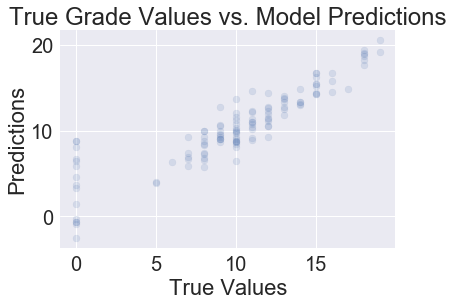

In [98]:
plt.scatter(y_cv, pred_cv, alpha = 0.15)
plt.xlabel('True Values')
plt.title('True Grade Values vs. Model Predictions')
plt.ylabel('Predictions')

In [99]:
df_student.shape

(394, 16)

In [100]:
X.shape

(394, 58)

### Create Correlation Matrix and Heatmap

In [101]:
correlation = X.corr()

In [102]:
correlation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.167128,-0.167587,0.068730,-0.004036,0.245223,0.053850,0.017071,0.125151,0.132754,...,0.100686,-0.100686,0.088097,-0.088097,0.209974,-0.209974,0.107117,-0.107117,-0.166836,0.166836
Medu,-0.167128,1.000000,0.621999,-0.174368,0.065175,-0.235826,-0.004102,0.031631,0.061921,0.021447,...,-0.111564,0.111564,-0.192170,0.192170,-0.168465,0.168465,-0.209622,0.209622,-0.041834,0.041834
Fedu,-0.167587,0.621999,1.000000,-0.161437,-0.009050,-0.249506,-0.001588,-0.012060,0.040465,0.004265,...,-0.116584,0.116584,-0.155841,0.155841,-0.174189,0.174189,-0.136400,0.136400,-0.018103,0.018103
traveltime,0.068730,-0.174368,-0.161437,1.000000,-0.100905,0.093242,-0.016947,-0.016565,0.026972,0.139576,...,0.005732,-0.005732,0.034398,-0.034398,0.084045,-0.084045,0.107580,-0.107580,-0.023421,0.023421
studytime,-0.004036,0.065175,-0.009050,-0.100905,1.000000,-0.173656,0.039738,-0.143234,-0.063870,-0.196151,...,-0.089886,0.089886,-0.081406,0.081406,-0.175118,0.175118,-0.059560,0.059560,-0.053243,0.053243
failures,0.245223,-0.235826,-0.249506,0.093242,-0.173656,1.000000,-0.044277,0.091748,0.125611,0.135515,...,0.070614,-0.070614,0.100212,-0.100212,0.300149,-0.300149,0.066440,-0.066440,-0.092411,0.092411
famrel,0.053850,-0.004102,-0.001588,-0.016947,0.039738,-0.044277,1.000000,0.150750,0.064495,-0.077538,...,-0.040901,0.040901,0.003662,-0.003662,-0.024285,0.024285,-0.033332,0.033332,0.063745,-0.063745
freetime,0.017071,0.031631,-0.012060,-0.016565,-0.143234,0.091748,0.150750,1.000000,0.285752,0.208769,...,-0.089242,0.089242,0.024402,-0.024402,0.061114,-0.061114,-0.050272,0.050272,0.011615,-0.011615
goout,0.125151,0.061921,0.040465,0.026972,-0.063870,0.125611,0.064495,0.285752,1.000000,0.268412,...,-0.048261,0.048261,-0.003582,0.003582,0.040206,-0.040206,-0.079480,0.079480,-0.009325,0.009325
Dalc,0.132754,0.021447,0.004265,0.139576,-0.196151,0.135515,-0.077538,0.208769,0.268412,1.000000,...,0.068020,-0.068020,0.084210,-0.084210,0.069542,-0.069542,-0.033370,0.033370,-0.014163,0.014163


In [103]:
import seaborn as sns

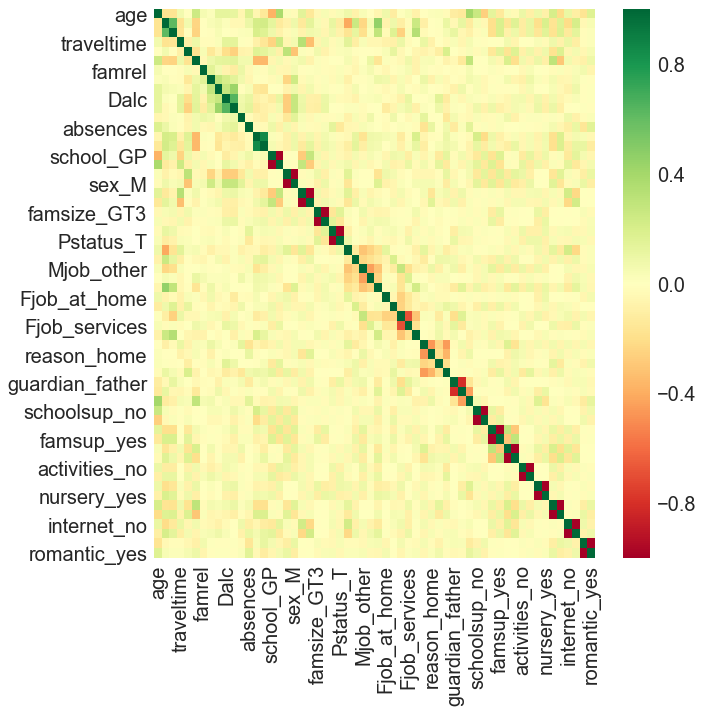

In [104]:
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlation, cmap = 'RdYlGn')    
plt.tight_layout()
plt.show()

In [105]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [106]:
df_student.shape

(394, 16)

In [107]:
df_student.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
1,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
2,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
3,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
4,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15


In [108]:
import numpy as np
import pandas as pd

In [109]:
X_train, X_test, y_train, y_test = train_test_split (df_student,df_student['G3'], test_size = 0.3, random_state=42)

In [110]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
17,17,3,2,1,1,3,5,5,5,2,4,5,16,6,5,5
353,17,4,3,2,2,0,4,5,5,1,3,2,4,13,11,11
24,16,2,2,1,1,2,1,2,2,1,3,5,14,6,9,8
126,19,0,1,1,2,3,3,4,2,1,1,5,2,7,8,9
345,18,4,3,1,3,0,5,3,2,1,2,4,9,16,15,16


### Use Decission Tree Regressor

Import modules

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Prediction Targets and Predictors

In [112]:
prediction_target = df_student.G3
predictor_data = X

In [113]:
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
1,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
2,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
3,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
4,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
5,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
6,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
7,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
8,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0
9,15,4,4,1,2,0,3,3,3,1,...,1,0,0,1,0,1,0,1,1,0


In [114]:
type(predictor_data)

pandas.core.frame.DataFrame

In [115]:
type(prediction_target)

pandas.core.series.Series

In [116]:
prediction_target.shape

(394,)

In [117]:
predictor_data.shape

(394, 58)

#### Decision Tree Regression Model

In [118]:
grade_model = DecisionTreeRegressor()
grade_model.fit(predictor_data, prediction_target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [119]:
predicted_data=grade_model.predict(predictor_data)

In [120]:
mean_absolute_error (prediction_target, predicted_data)

0.0

In [121]:
print('Original data used as predictor data:')
print(predictor_data.head())
print('Predicted data using predictor_data and prediction target:')
grade_model.predict(predictor_data.head())

Original data used as predictor data:
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   17     1     1           1          2         0       5         3      3   
1   15     1     1           1          2         3       4         3      2   
2   15     4     2           1          3         0       3         2      2   
3   16     3     3           1          2         0       4         3      2   
4   16     4     3           1          2         0       5         4      2   

   Dalc      ...       activities_no  activities_yes  nursery_no  nursery_yes  \
0     1      ...                   1               0           1            0   
1     2      ...                   1               0           0            1   
2     1      ...                   0               1           0            1   
3     1      ...                   1               0           0            1   
4     1      ...                   0               1           0            

array([  6.,  10.,  15.,  10.,  15.])

In [122]:
predictor_data_train, predictor_data_val, prediction_target_train, prediction_target_val = train_test_split(predictor_data, prediction_target, random_state = 0)

In [123]:
predictor_data_val

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
113,15,2,1,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,0,1
281,18,1,1,2,4,0,5,2,2,1,...,0,1,0,1,0,1,1,0,1,0
68,15,3,1,2,4,0,4,4,2,2,...,1,0,1,0,0,1,0,1,1,0
155,17,1,2,1,1,0,2,2,2,3,...,1,0,0,1,0,1,1,0,1,0
329,18,2,2,1,4,0,4,5,5,2,...,0,1,0,1,0,1,0,1,1,0
357,18,1,1,2,1,0,3,3,2,1,...,1,0,1,0,0,1,0,1,0,1
229,17,4,3,1,2,0,3,2,3,1,...,0,1,0,1,0,1,0,1,0,1
334,17,3,4,1,3,0,4,4,5,1,...,1,0,0,1,0,1,0,1,1,0
186,16,2,1,1,2,0,4,2,3,1,...,0,1,0,1,0,1,0,1,0,1
342,17,2,2,1,2,1,3,3,1,1,...,1,0,0,1,0,1,0,1,0,1


In [124]:
prediction_target_val.shape

(99,)

In [125]:
print('Out-of-sample MAE:')
new_model = DecisionTreeRegressor()
new_model.fit(predictor_data_train, prediction_target_train)
new_prediction = new_model.predict(predictor_data_val)
mean_absolute_error(prediction_target_val, new_prediction)

Out-of-sample MAE:


1.0303030303030303

In [126]:
new_prediction_len = new_prediction[:41]

In [127]:
len(new_prediction_len)

41

In [128]:
prediction_target_len = prediction_target[:41]

In [129]:
len(prediction_target_len)

41

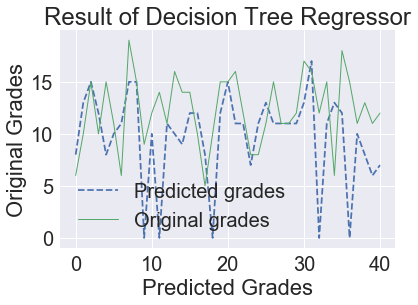

In [130]:
plt.plot(new_prediction_len, '--', label = 'Predicted grades')
plt.plot(prediction_target_len, label = 'Original grades', linewidth = 1)
plt.legend()
plt.ylabel('Original Grades')
plt.xlabel('Predicted Grades')
plt.title('Result of Decision Tree Regressor')
plt.show()

### Find important model features

In [131]:
new_model.feature_importances_

array([  2.31526231e-02,   8.23058286e-04,   5.49341518e-04,
         3.40713535e-04,   8.38957534e-04,   7.65831105e-03,
         1.84972604e-03,   1.52251701e-02,   1.93676676e-03,
         8.28123175e-05,   3.09012475e-03,   1.42301137e-02,
         1.27126520e-01,   3.23627140e-03,   7.51295153e-01,
         0.00000000e+00,   0.00000000e+00,   2.44190167e-04,
         0.00000000e+00,   1.70593374e-03,   1.10416423e-04,
         1.50567850e-04,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   8.70031227e-04,   1.86327714e-04,
         2.20832847e-04,   1.65624635e-04,   2.48436953e-04,
         0.00000000e+00,   9.63634240e-04,   3.12138735e-04,
         1.04035931e-02,   0.00000000e+00,   1.32499708e-04,
         1.02864729e-02,   2.74463681e-04,   6.95229123e-04,
         5.27928524e-04,   1.00952159e-03,   0.00000000e+00,
         2.20832847e-04,   4.20962614e-04,   0.00000000e+00,
         8.28123175e-05,   1.90862675e-04,   5.79686223e-04,
         0.00000000e+00,

In [132]:
important_features = pd.Series(data=new_model.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 <a list of 9 Text xticklabel objects>)

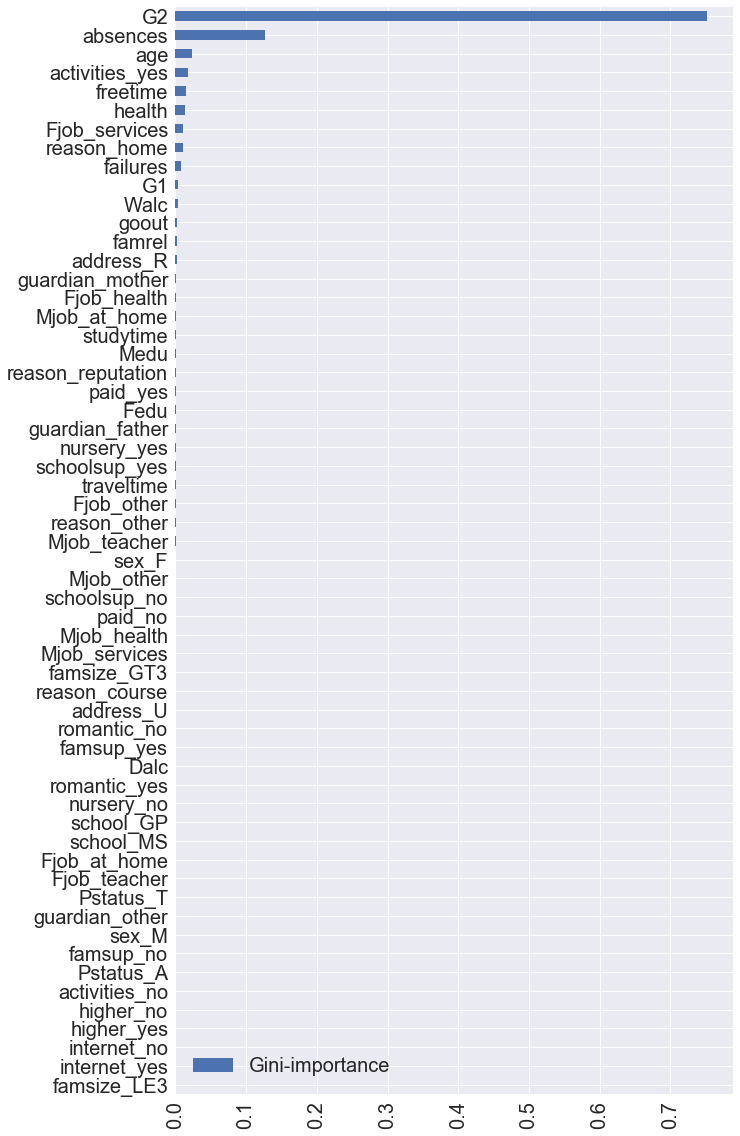

In [133]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, new_model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#log_importances = np.log(importances)

importances.sort_values(by='Gini-importance').plot(kind='barh', figsize = (10,20))
plt.xticks(fontsize=20, rotation=90)

In [134]:
importances

,Gini-importance
age,0.023153
Medu,0.000823
Fedu,0.000549
traveltime,0.000341
studytime,0.000839
failures,0.007658
famrel,0.001850
freetime,0.015225
goout,0.001937
Dalc,0.000083


In [135]:
importances_drop_G2 = importances.drop('G2')

importances_drop_G2

,Gini-importance
age,0.023153
Medu,0.000823
Fedu,0.000549
traveltime,0.000341
studytime,0.000839
failures,0.007658
famrel,0.001850
freetime,0.015225
goout,0.001937
Dalc,0.000083


#### Plot Features Importance without Feature G2

(array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14]),
 <a list of 8 Text xticklabel objects>)

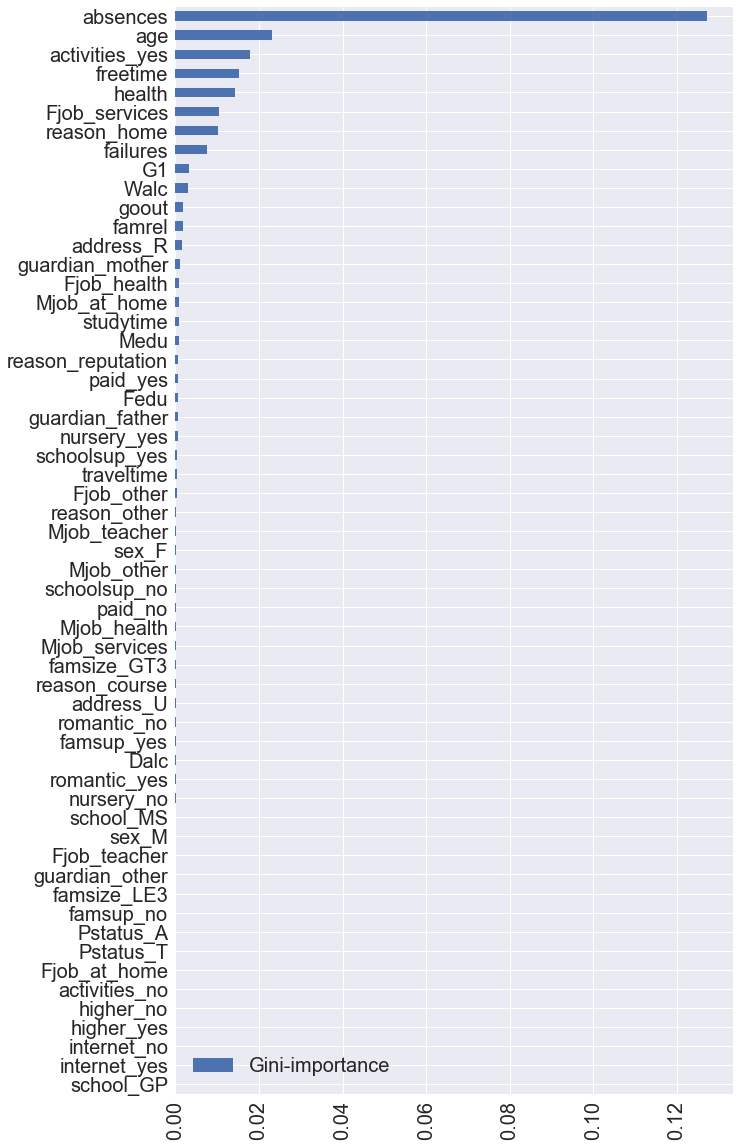

In [136]:
importances_drop_G2.sort_values(by='Gini-importance').plot(kind='barh', figsize = (10,20))
plt.xticks(fontsize=20, rotation=90)